In this notebook, we

* load up the saved .png files.
* read the image into a numpy array.
* partition the image into individual arrays (recall that each image is '012345689') representing each number.
* resize each digit image into 16*16

The features are the eigenvectors for each image array. Thus, if we have n images in our training set, this process produces an n * 16 feature matrix.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import pandas as pd
import cv2
import os

image_dir = os.path.join(os.getcwd(), 'font_images')

if not os.path.isdir(image_dir) or len(os.listdir(image_dir)) == 0:
    print('no images found in {}'.format(image_dir))

Here, we outline the processing for a single image.

In [14]:
img_mat = cv2.imread(os.path.join(image_dir, 'arial.png'))

# Convert to grayscale
gs = cv2.cvtColor(img_mat, cv2.COLOR_BGR2GRAY)

# Binarize with threshold 127
_, binarized = cv2.threshold(gs, 127, 255, cv2.THRESH_BINARY)

In [15]:
binarized.shape

(50, 400)

(-0.5, 399.5, 49.5, -0.5)

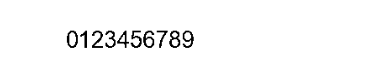

In [17]:
pylab.imshow(binarized, cmap='gray')
pylab.axis('off')

In [55]:
# Remove completely empty rows and columns. 
# A completely empty row (or column) has no on pixels, i.e. every cell has the value 255.
empty_columns = np.all(binarized == 255, axis=0)
empty_rows = np.all(binarized == 255, axis=1)
truncated = binarized[:, ~empty_columns]
truncated = truncated[~empty_rows, :]

In [61]:
truncated.shape

(20, 125)

In [106]:
# Partition the columns into 10 equal parts
split_cols = np.linspace(0, truncated.shape[1], num=11).astype(np.int)
split_cols = split_cols[1:-1]

array([ 12,  25,  37,  50,  62,  75,  87, 100, 112])

In [107]:
parts = np.array_split(truncated, split_cols, axis=1)

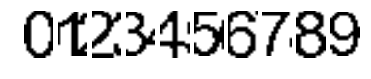

In [111]:
fig, axes = pylab.subplots(1, len(parts))

for i, ax in enumerate(axes):
    ax.imshow(parts[i], cmap='gray')
    ax.axis('off')

In [121]:
# Resize to 16 * 16 and calculate the Eigenvalues
resized = [cv2.resize(p, (16, 16)) for p in parts]
eigs = [np.real(np.linalg.eig(p)[0]) for p in resized]
eigs = np.array(eigs)

In [123]:
eigs_df = pd.DataFrame(eigs)
eigs_df.mean(axis)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,2521.424425,968.176593,-525.938705,240.339017,-21.593460,2.029740,-0.437610,1.727334e-13,1.727334e-13,-9.688138e-14,-1.081416e-14,-1.081416e-14,1.399063e-15,-1.487773e-16,1.324927e-16,-5.603415e-30
1,0.000000,2130.015600,-506.484262,8.788913,8.788913,217.364542,164.386513,-9.720150e+01,-6.713656e+01,3.375606e+01,3.375606e+01,7.959108e-02,-1.138689e-01,6.226471e-14,-2.906103e-14,1.527551e-14
2,2469.670695,736.455420,-371.059772,-306.046549,-306.046549,40.835903,40.835903,-1.102850e+02,9.534729e+01,-6.971081e+01,3.673374e+01,3.673374e+01,1.641390e+00,1.210501e-01,-1.132175e-01,-1.132175e-01
3,2660.270849,-776.506259,285.049336,-59.986559,-59.986559,-156.925381,117.552616,3.816190e+01,3.816190e+01,-4.354137e+01,-1.183510e+01,4.744182e+00,-1.595535e-01,-2.051687e-07,2.051678e-07,1.670260e-14
4,0.000000,0.000000,2484.680154,445.828386,-305.628029,102.115135,102.115135,-1.334278e+02,-4.155202e+01,1.478910e+01,-4.743473e-03,-4.743473e-03,8.946935e-02,-7.537749e-12,-7.537749e-12,1.611471e-13
5,2283.411633,479.054141,479.054141,-366.635697,-221.432277,-221.432277,-95.241932,1.270330e+02,6.624232e+01,-2.250883e+01,1.327650e+01,3.009426e-01,-6.083578e-02,-6.083578e-02,7.118025e-14,-2.301750e-12
6,2410.847276,-383.760035,188.032562,188.032562,234.367288,234.367288,-124.365833,7.766040e+01,-3.537362e+00,3.307446e+00,4.840526e-02,6.766718e-08,-6.652984e-14,-6.652984e-14,-6.766823e-08,-1.713985e-15
7,2823.605781,556.110768,-469.493229,220.045370,220.045370,-142.658903,59.615636,5.961564e+01,-5.812334e+01,-5.812334e+01,6.472815e-01,6.472815e-01,-9.706525e-02,4.195463e-13,8.137632e-02,8.137632e-02
8,2070.421030,372.483205,372.483205,-220.131469,155.786194,-120.258479,27.454818,2.745482e+01,-2.135312e+01,-1.884351e+01,8.722577e-01,-3.689504e-01,-6.054569e-07,-1.891461e-07,6.054552e-07,1.891465e-07
9,2327.794657,704.716251,-254.234662,230.890398,230.890398,-73.411304,-73.411304,8.013760e+00,8.013760e+00,-3.253448e+01,8.592538e-01,1.930510e-01,1.930510e-01,2.716919e-02,-5.927488e-12,-5.927488e-12


Now, we package all of above into a single function. Then we iterate over all the saved files and produce the feature matrix.

In [129]:
def eigenvalues(img_file, class_labels, threshold=127, n_dims=16):
    """
    Read the image file
    grayscale+binarize using threshold
    split into per-digit subarrays, 
    resize each image and return the eigenvalues for each subarray.
    
    Return a len(class_labels) * n_dims DataFrame.
    """
    assert os.path.isfile(img_file)
    
    img_mat = cv2.imread(os.path.join(image_dir, img_file))    
    gs = cv2.cvtColor(img_mat, cv2.COLOR_BGR2GRAY)    
    _, binarized = cv2.threshold(gs, threshold, 255, cv2.THRESH_BINARY)
    
    empty_columns = np.all(binarized == 255, axis=0)
    empty_rows = np.all(binarized == 255, axis=1)
    truncated = binarized[:, ~empty_columns]
    truncated = truncated[~empty_rows, :]
    
    n_classes = len(class_labels)
    
    split_cols = np.linspace(0, truncated.shape[1], num=n_classes+1).astype(np.int)
    split_cols = split_cols[1:-1]

    parts = np.array_split(truncated, split_cols, axis=1)
    assert len(parts) == n_classes
    
    eigs = np.zeros([n_classes, n_dims])
    
    for i, p in enumerate(parts):
        resized_p = cv2.resize(p, (n_dims, n_dims))
        eigs[i, :] = np.real(np.linalg.eig(resized_p)[0])
        
    eig_df = pd.DataFrame(eigs, index=class_labels)
    
    return eig_df
    

In [130]:
image_files = [os.path.join(image_dir, f) for f in os.listdir(image_dir)]

In [134]:
from IPython.display import display
from ipywidgets import FloatProgress

prog = FloatProgress(min=1, max=len(image_files), description='generating eigenvalues...')
display(prog)


features = []

for file_path in image_files:
    class_labels = list('0123456789')
    features.append(eigenvalues(file_path, class_labels))
    prog.value += 1
    
prog.bar_style = 'success'

In [135]:
len(features)

139

In [136]:
features_df = pd.concat(features, axis=0)

In [137]:
features_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1390.000000,1.390000e+03,1.390000e+03,1.390000e+03,1.390000e+03,1.390000e+03,1.390000e+03,1.390000e+03,1.390000e+03,1.390000e+03
mean,2206.873803,227.886641,53.004370,59.498355,-3.168029,17.661228,8.790371,4.498541e+00,1.187652e+00,-4.457652e-02,-1.663003e-01,-3.699749e-02,5.848195e-01,8.115096e-01,1.756888e+00,8.804267e-01
std,880.796825,691.090591,533.767696,392.967763,260.395246,224.488103,136.046143,1.128167e+02,6.512895e+01,4.542985e+01,3.198693e+01,2.215837e+01,1.651042e+01,1.260195e+01,2.124881e+01,1.253279e+01
min,0.000000,-1029.785588,-808.213030,-717.424040,-662.513372,-541.507332,-600.257021,-5.260702e+02,-2.983823e+02,-1.822911e+02,-1.822911e+02,-1.474296e+02,-8.829334e+01,-6.801990e+01,-3.953122e+01,-3.953122e+01
25%,1920.591445,-352.252588,-313.286113,-214.378426,-178.713081,-115.050396,-83.081610,-5.847509e+01,-3.779890e+01,-1.961545e+01,-5.663239e+00,-8.121068e-01,-2.106573e-01,-3.710314e-02,-1.624200e-12,-5.012279e-14
50%,2451.670615,257.365823,0.000000,16.891496,-12.803140,5.076677,1.749795,-2.204863e-14,-2.514656e-11,-3.840973e-13,-2.397404e-14,1.147997e-15,1.344859e-17,-1.723083e-30,0.000000e+00,0.000000e+00
75%,2792.750106,654.312502,322.186662,253.429116,155.634151,124.505883,92.991124,6.278128e+01,3.906787e+01,1.485591e+01,3.414847e+00,5.619544e-01,1.993677e-01,6.811036e-03,1.598241e-11,5.556489e-14
max,3445.546490,2981.651186,2998.011938,2512.441107,2147.068361,2245.585788,1490.000000,1.530000e+03,2.437046e+02,1.723790e+02,1.470000e+02,1.673147e+02,2.230000e+02,2.310000e+02,5.100000e+02,2.550000e+02


In [138]:
feature_file = os.path.join(os.getcwd(), 'digit_eigenvalues.csv')
features_df.to_csv(feature_file, index_label='label')